In [3]:
import config
import pandas as pd
import glob

#### Notes:

- Focus only on participant 1 data
- Normalize data and plot 


#### Learned:

- No need to normalize data for random forest, take a look at this SO post:

[link](http://stackoverflow.com/questions/8961586/do-i-need-to-normalize-or-scale-data-for-randomforest-r-package)


>No, scaling is not necessary for random forests.

>The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a NN.

>You're don't get any analogue of a regression coefficient, which measures the relationship between each predictor variable and the response. Because of this, you also don't need to consider how to interpret such coefficients which is something that is affected by variable measurement scales.


#### Load Data

In [4]:
train_file,test_file = '1.csv','7.csv'
df_train,df_test = pd.read_csv(config.data_dir+train_file,sep=',',names=config.cols) ,\
                   pd.read_csv(config.data_dir+test_file,sep=',',names=config.cols)
print('train: ',df_train.shape, 'test: ', df_test.shape)
df_train.head(0)

train:  (162501, 5) test:  (163001, 5)


,sequential_number,x_acceleration,y_acceleration,z_acceleration,label


#### Preprocess Data

In [5]:
#  preprocess data to remove instances with zero as a label
df_train, df_test = df_train[df_train['label']>0] ,df_test[df_test['label']>0] 

In [6]:
X_cols = ['x_acceleration','y_acceleration','z_acceleration']
X_train,y_train = df_train[X_cols],df_train['label']

X_test,y_test = df_test[X_cols],df_test['label']

print('train: ',X_train.shape,y_train.shape)
print('test: ',X_test.shape,y_test.shape)

train:  (162500, 3) (162500,)
test:  (163000, 3) (163000,)


##### Normalization

In [9]:
from sklearn.preprocessing import StandardScaler , RobustScaler

normilizer_standard = StandardScaler(with_mean=True,with_std=True)
X_norm_standard = pd.DataFrame(normilizer_standard.fit_transform(X_train),columns=X_cols)

normilizer_robust = RobustScaler(with_centering=True)
X_norm_robust  = pd.DataFrame(normilizer_robust.fit_transform(X_train),columns=X_cols)

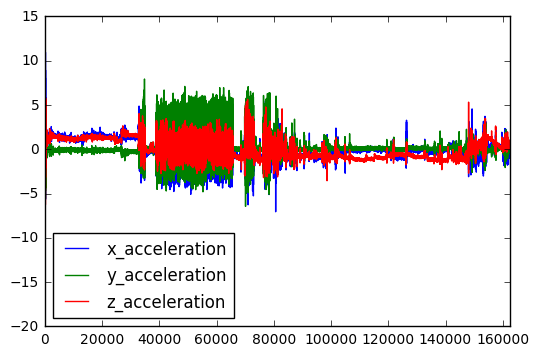

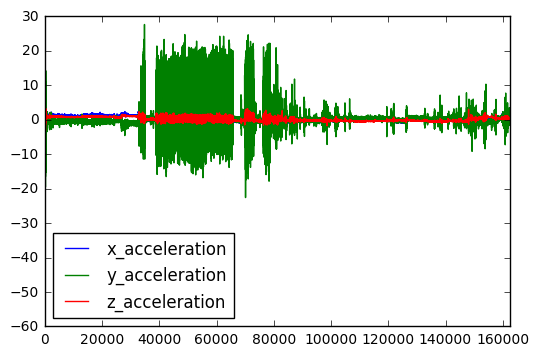

In [10]:
%matplotlib inline

X_norm_standard.plot()

X_norm_robust.plot()

#### Train Data and Cross-Validate

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [12]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=100,random_state=2)

In [17]:
clf_score = cross_val_score(clf,X_train,y_train,cv=5,n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_score.mean(), clf_score.std() * 2))
feat_rank(X_train,y_train)

Accuracy: 0.74 (+/- 0.28)
Feature ranking:
1.	feature x_acceleration	(0.35193271324077097)
2.	feature y_acceleration	(0.3242097380283594)
3.	feature z_acceleration	(0.32385754873086947)


In [19]:
clf_score_standard = cross_val_score(clf,X_norm_standard,y_train,cv=5,n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_score_standard.mean(), clf_score_standard.std() * 2))
feat_rank(X_norm_standard,y_train)

Accuracy: 0.74 (+/- 0.28)
Feature ranking:
1.	feature x_acceleration	(0.35193271324077097)
2.	feature y_acceleration	(0.3242097380283594)
3.	feature z_acceleration	(0.32385754873086947)


In [20]:
clf_score_robust = cross_val_score(clf,X_norm_robust,y_train,cv=5,n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_score_robust.mean(), clf_score_robust.std() * 2))
feat_rank(X_norm_robust,y_train)

Accuracy: 0.74 (+/- 0.28)
Feature ranking:
1.	feature x_acceleration	(0.35193271324077097)
2.	feature y_acceleration	(0.3242097380283594)
3.	feature z_acceleration	(0.32385754873086947)


In [16]:
# Feature Ranking
import numpy as np

def feat_rank(X,y):   
    clf.fit(X,y)
    print("Feature ranking:")
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    for f in range(X.shape[1]):
        print("{}.\tfeature {}\t({})".format(f + 1, X.columns[int(indices[f])], importances[indices[f]]))

#### Test on other participant

In [27]:
clf.fit(X_train,y_train)
print("Accuracy: %0.2f " % (clf.score(X_test,y_test)))

Accuracy: 0.33 
